In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")

In [2]:
senti_path = 'SA_SR'
stock_path = 'Stock_return_vol'

In [3]:
df = pd.read_csv('Ticker.csv')

In [4]:
ticker = list(df['Ticker'])

# Distribution Plot
1) Replicate the graphs in Figure 2 of the SKTA(2015) reference.

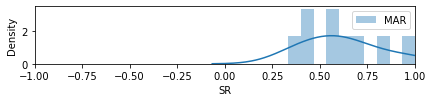

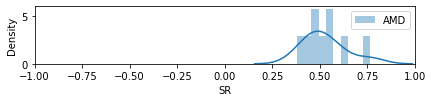

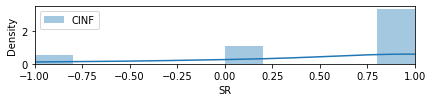

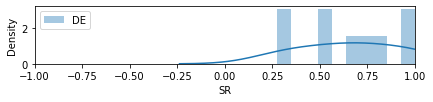

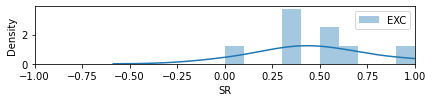

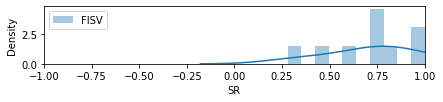

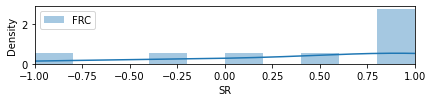

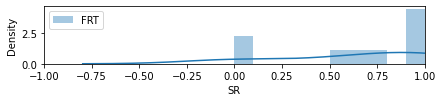

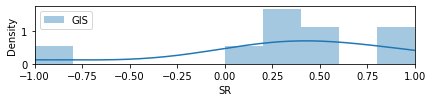

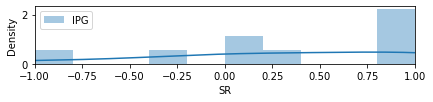

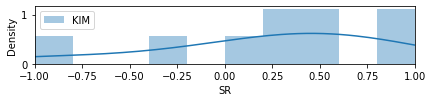

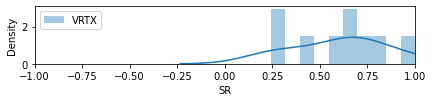

In [5]:
for i in range(len(ticker)):
    senti_name = ticker[i] + '_sa_sr.csv'
    senti_dir = os.path.join(senti_path, senti_name)
    df_senti = pd.read_csv(senti_dir,index_col=0)
    
    f = plt.figure(figsize=(15,15))
    plt.subplot(len(ticker), 2, i+1)
    #sns.kdeplot(SR)
    sns.distplot(df_senti.loc['SR',:], bins = 10, label = ticker[i], axlabel = 'SR')
    plt.xlim(-1,1)
    plt.legend()
    

# Granger-causality analysis

In [6]:
from statsmodels.tsa.stattools import grangercausalitytests

In [7]:
day_list=['2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11']

In [8]:
ER = []
VOL = []
G = []
B = []
SR = []
SA = []
V = []

In [9]:
ER_all_p = []
VOL_all_p = []

In [10]:
for i in range(len(ticker)):
    senti_name = ticker[i] + '_sa_sr.csv'
    senti_dir = os.path.join(senti_path, senti_name)
    df_senti = pd.read_csv(senti_dir,index_col=0)
    
    stock_name = ticker[i] + '_price.csv'
    stock_dir = os.path.join(stock_path, stock_name)
    df_stock = pd.read_csv(stock_dir,index_col=0)
    
    
    _ER = df_stock.loc[day_list[0]:day_list[-1],'Excess_return']
    _VOL = df_stock.loc[day_list[0]:day_list[-1],'Vol']
    
    
    _G = df_senti.loc['POS',day_list[0]:day_list[-1]]
    _B = df_senti.loc['NEG',day_list[0]:day_list[-1]]
    _SR = df_senti.loc['SR',day_list[0]:day_list[-1]]
    _SA = df_senti.loc['SA',day_list[0]:day_list[-1]]
    _V = df_senti.loc['num_tw',day_list[0]:day_list[-1]]
    
    ER += list(_ER)
    VOL += list(_VOL)
    G += list(_G)
    B += list(_B)
    SR += list(_SR)
    SA += list(_SA)
    V += list(_V)
    
    if len(list(set(list(_G)))) == 1:
        _G[-2] -= 1/1000
    if len(list(set(list(_B)))) == 1:
        _B[-2] -= 1/1000
    if len(list(set(list(_SR)))) == 1:
        _SR[-2] -= 1/1000
    if len(list(set(list(_SA)))) == 1:
        _SA[-2] -= 1/1000 
    if len(list(set(list(_V)))) == 1:
        _V[-2] -= 1/1000 
        
    
    tem = pd.DataFrame()
    tem['ER'] = list(_ER)
    tem['VOL'] = list(_VOL)
    tem['G'] = list(_G)
    tem['B'] = list(_B)
    tem['SR'] = list(_SR)
    tem['SA'] = list(_SA)
    tem['V'] = list(_V)
    
    ER_tem_p = []
    # GC of ER
    tem_result = grangercausalitytests(tem[['SA', 'ER']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['ER', 'SA']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['G', 'ER']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['ER', 'G']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['B', 'ER']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['ER', 'B']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['SR', 'ER']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    
    tem_result = grangercausalitytests(tem[['ER', 'SR']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    ER_tem_p.append(p_tem)
    
    ER_all_p.append(ER_tem_p)
    
    # GC of VOL
    VOL_tem_p = []
    
    tem_result = grangercausalitytests(tem[['SA', 'VOL']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['VOL', 'SA']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['G', 'VOL']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['VOL', 'G']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['B', 'VOL']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['VOL', 'B']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['SR', 'VOL']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    
    tem_result = grangercausalitytests(tem[['VOL', 'SR']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    tem_result = grangercausalitytests(tem[['V', 'VOL']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    
    tem_result = grangercausalitytests(tem[['VOL', 'V']], maxlag=1)
    all_p = []
    for k in range(1):
        for kk in range(4):
            a = list(tem_result[k + 1][0].values())
            all_p.append(a[kk][1])
    p_tem = sum(all_p) / len(all_p)
    VOL_tem_p.append(p_tem)
    
    VOL_all_p.append(VOL_tem_p)
    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1995  , p=0.7326  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=0.7982  , p=0.3716  , df=1
likelihood ratio test: chi2=0.7278  , p=0.3936  , df=1
parameter F test:         F=0.1995  , p=0.7326  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7941  , p=0.5366  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=3.1765  , p=0.0747  , df=1
likelihood ratio test: chi2=2.3381  , p=0.1262  , df=1
parameter F test:         F=0.7941  , p=0.5366  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1841  , p=0.7419  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=0.7366  , p=0.3908  , df=1
likelihood ratio test: chi2=0.6761  , p=0.4109  , df=1
parameter F test:         F=0.1841  , p=0.7419  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6618  , p=0.5652  , df_denom=1

ssr based F test:         F=10.8372 , p=0.1877  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=43.3487 , p=0.0000  , df=1
likelihood ratio test: chi2=9.8850  , p=0.0017  , df=1
parameter F test:         F=10.8372 , p=0.1877  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0797  , p=0.8248  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=0.3189  , p=0.5723  , df=1
likelihood ratio test: chi2=0.3068  , p=0.5796  , df=1
parameter F test:         F=0.0797  , p=0.8248  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0440  , p=0.2938  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=16.1760 , p=0.0001  , df=1
likelihood ratio test: chi2=6.4728  , p=0.0110  , df=1
parameter F test:         F=4.0440  , p=0.2938  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9966  , p=0.2164  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=31.9862

number of lags (no zero) 1
ssr based F test:         F=5.2236  , p=0.2626  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=20.8942 , p=0.0000  , df=1
likelihood ratio test: chi2=7.3134  , p=0.0068  , df=1
parameter F test:         F=5.2236  , p=0.2626  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.7571 , p=0.1409  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=79.0282 , p=0.0000  , df=1
likelihood ratio test: chi2=12.1315 , p=0.0005  , df=1
parameter F test:         F=19.7571 , p=0.1409  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0259  , p=0.8984  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=0.1037  , p=0.7474  , df=1
likelihood ratio test: chi2=0.1024  , p=0.7490  , df=1
parameter F test:         F=0.0259  , p=0.8984  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9272  , p=0.2312  , df_denom=1, df_num=1
ssr base


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.1485 , p=0.1508  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=68.5941 , p=0.0000  , df=1
likelihood ratio test: chi2=11.5944 , p=0.0007  , df=1
parameter F test:         F=17.1485 , p=0.1508  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0146  , p=0.9235  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=0.0584  , p=0.8091  , df=1
likelihood ratio test: chi2=0.0580  , p=0.8097  , df=1
parameter F test:         F=0.0146  , p=0.9235  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1929  , p=0.7366  , df_denom=1, df_num=1
ssr based chi2 test:   chi2=0.7715  , p=0.3798  , df=1
likelihood ratio test: chi2=0.7054  , p=0.4010  , df=1
parameter F test:         F=0.1929  , p=0.7366  , df_denom=1, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0944  , p=0.8102  , df_denom=1

## GC test of individual stocks

### ER

In [11]:
#GC of ER
GC_ER_result = pd.DataFrame(ER_all_p)
GC_ER_result.columns = ['SA-ER','ER-SA','G-ER','ER-G','B-ER','ER-B','SA-ER','ER-SA']
GC_ER_result.index = ticker
GC_ER_result

,SA-ER,ER-SA,G-ER,ER-G,B-ER,ER-B,SA-ER,ER-SA
MAR,0.557587,0.318539,0.571394,0.347068,0.840630,0.646028,0.311518,0.322259
AMD,0.203619,0.235863,0.089717,0.272964,0.013838,0.091352,0.863764,0.177625
CINF,0.980824,0.219073,0.980824,0.219073,0.476356,0.233631,0.476356,0.233631
DE,0.817907,0.707447,0.122323,0.530250,0.102927,0.215082,0.234465,0.103965
EXC,0.165556,0.734857,0.102064,0.631438,0.112453,0.249789,0.370087,0.716573
FISV,0.695943,0.847094,0.833536,0.660036,0.599752,0.430008,0.964627,0.152380
FRC,0.109141,0.044569,0.353063,0.082627,0.262604,0.469431,0.262604,0.469431
FRT,0.070564,0.823290,0.116580,0.643359,0.122412,0.287636,0.122412,0.287636
GIS,0.124274,0.574896,0.140192,0.894405,0.528416,0.145454,0.342741,0.378331
IPG,0.908628,0.496483,0.015677,0.675017,0.125993,0.165325,0.152291,0.004529


### VOL

In [12]:
#GC of VOL
GC_VOL_result = pd.DataFrame(VOL_all_p)
GC_VOL_result.columns = ['SA-VOL','VOL-SA','G-VOL','VOL-G','B-VOL','VOL-B','SA-VOL','VOL-SA','V_VOL','VOL_V']
GC_VOL_result.index = ticker
GC_VOL_result

,SA-VOL,VOL-SA,G-VOL,VOL-G,B-VOL,VOL-B,SA-VOL,VOL-SA,V_VOL,VOL_V
MAR,0.027193,0.886358,0.030019,0.995348,0.052071,0.655882,0.248619,0.112002,0.045509,0.932376
AMD,0.056287,0.956084,0.138578,0.973565,0.008514,0.243076,0.279736,0.869951,0.883261,0.778612
CINF,0.961590,0.349998,0.961590,0.349998,0.126222,0.028626,0.126222,0.028626,0.545998,0.058300
DE,0.094289,0.700387,0.149641,0.108953,0.630926,0.069184,0.601632,0.080872,0.369608,0.009111
EXC,0.542956,0.912496,0.739858,0.918825,0.617268,0.932544,0.218115,0.893251,0.134611,0.579996
FISV,0.188236,0.649353,0.319512,0.629108,0.919931,0.562599,0.057928,0.103021,0.625152,0.545160
FRC,0.168351,0.274639,0.031661,0.169029,0.106160,0.015137,0.106160,0.015137,0.000713,0.132997
FRT,0.202385,0.970717,0.212762,0.816953,0.105281,0.374664,0.105281,0.374664,0.161801,0.549370
GIS,0.151634,0.728586,0.539517,0.628658,0.157694,0.109453,0.015271,0.382465,0.679125,0.085207
IPG,0.042070,0.075088,0.217927,0.217411,0.248656,0.359059,0.072754,0.009624,0.032171,0.539548


* Combine the data together to conduct the GC test

In [13]:
big_data = pd.DataFrame()
big_data['ER'] = ER
big_data['VOL'] = VOL
big_data['G'] = G
big_data['B'] = B
big_data['SR'] = SR
big_data['SA'] = SA
big_data['V'] = V

In [14]:
big_data.head()

,ER,VOL,G,B,SR,SA,V
0,-0.017678,0.023406,20.0,2.0,0.818182,18.0,30.0
1,-0.006010,0.023528,8.0,4.0,0.333333,4.0,16.0
2,-0.006807,0.038079,15.0,6.0,0.428571,9.0,33.0
3,0.010242,0.027020,65.0,16.0,0.604938,49.0,116.0
4,-0.023878,0.032145,22.0,6.0,0.571429,16.0,42.0


In [15]:
df_result_ER = pd.DataFrame()
df_result_VOL = pd.DataFrame()

In [16]:
# All ER
tem_result = grangercausalitytests(big_data[['SA', 'ER']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','SA-ER'] = p_tem

tem_result = grangercausalitytests(big_data[['ER', 'SA']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','ER-SA'] = p_tem

tem_result = grangercausalitytests(big_data[['SR', 'ER']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','SR-ER'] = p_tem

tem_result = grangercausalitytests(big_data[['ER', 'SR']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','ER-SR'] = p_tem

tem_result = grangercausalitytests(big_data[['G', 'ER']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','G-ER'] = p_tem

tem_result = grangercausalitytests(big_data[['ER', 'G']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','ER-G'] = p_tem

tem_result = grangercausalitytests(big_data[['B', 'ER']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','B-ER'] = p_tem

tem_result = grangercausalitytests(big_data[['ER', 'B']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_ER.loc['P-value','ER-B'] = p_tem


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8430  , p=0.0114  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=7.2096  , p=0.0073  , df=1
likelihood ratio test: chi2=6.8020  , p=0.0091  , df=1
parameter F test:         F=6.8430  , p=0.0114  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6507  , p=0.0327  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=7.9901  , p=0.0184  , df=2
likelihood ratio test: chi2=7.4856  , p=0.0237  , df=2
parameter F test:         F=3.6507  , p=0.0327  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4711  , p=0.0725  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=8.4512  , p=0.0376  , df=3
likelihood ratio test: chi2=7.8805  , p=0.0485  , df=3
parameter F test:         F=2.4711  , p=0.0725  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6187  , p=0.1112  , df_d

In [17]:
# All VOL
tem_result = grangercausalitytests(big_data[['SA', 'VOL']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','SA-VOL'] = p_tem

tem_result = grangercausalitytests(big_data[['VOL', 'SA']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','VOL-SA'] = p_tem

tem_result = grangercausalitytests(big_data[['SR', 'VOL']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','SR-VOL'] = p_tem

tem_result = grangercausalitytests(big_data[['VOL', 'SR']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','VOL-SR'] = p_tem

tem_result = grangercausalitytests(big_data[['G', 'VOL']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','G-VOL'] = p_tem

tem_result = grangercausalitytests(big_data[['VOL', 'G']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','VOL-G'] = p_tem

tem_result = grangercausalitytests(big_data[['B', 'VOL']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','B-VOL'] = p_tem

tem_result = grangercausalitytests(big_data[['VOL', 'B']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','VOL-B'] = p_tem

tem_result = grangercausalitytests(big_data[['V', 'VOL']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','V-VOL'] = p_tem

tem_result = grangercausalitytests(big_data[['VOL', 'V']], maxlag=3)
all_p = []
for k in range(3):
    for kk in range(4):
        a = list(tem_result[k + 1][0].values())
        all_p.append(a[kk][1])
p_tem = sum(all_p) / len(all_p)
df_result_VOL.loc['P-value','VOL-V'] = p_tem



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2338  , p=0.0155  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=6.5678  , p=0.0104  , df=1
likelihood ratio test: chi2=6.2273  , p=0.0126  , df=1
parameter F test:         F=6.2338  , p=0.0155  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7274  , p=0.0306  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=8.1582  , p=0.0169  , df=2
likelihood ratio test: chi2=7.6331  , p=0.0220  , df=2
parameter F test:         F=3.7274  , p=0.0306  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7582  , p=0.0519  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=9.4329  , p=0.0241  , df=3
likelihood ratio test: chi2=8.7290  , p=0.0331  , df=3
parameter F test:         F=2.7582  , p=0.0519  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8351 , p=0.0011  , df_d

In [18]:
df_result_ER

,SA-ER,ER-SA,SR-ER,ER-SR,G-ER,ER-G,B-ER,ER-B
P-value,0.031487,0.047687,0.164432,0.341364,0.017515,0.064268,0.012621,0.134351


In [19]:
df_result_VOL

,SA-VOL,VOL-SA,SR-VOL,VOL-SR,G-VOL,VOL-G,B-VOL,VOL-B,V-VOL,VOL-V
P-value,0.02625,0.000664,0.702923,0.94218,0.023299,0.001282,0.064331,0.005826,0.061765,0.002197


# Regression
2) Complete statistical analysis of the relationship between excess returns, volume and volatility with Twitter Sentiment across your sample of 12 individual securities over the most recent 7-day period available to you via the Twitter API. When searching for tweets on your specific tickers assigned, use the format '$IBM' to differentiate tweets about publicly-traded companies versus others tweets.

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

* As for each stock, there are only 5 points, the regression of each stock may not be very well, so we deciede to use the data of all stocks

In [21]:
big_data

,ER,VOL,G,B,SR,SA,V
0,-0.017678,0.023406,20.0,2.0,0.818182,18.0,30.0
1,-0.006010,0.023528,8.0,4.0,0.333333,4.0,16.0
2,-0.006807,0.038079,15.0,6.0,0.428571,9.0,33.0
3,0.010242,0.027020,65.0,16.0,0.604938,49.0,116.0
4,-0.023878,0.032145,22.0,6.0,0.571429,16.0,42.0
5,0.002376,0.021599,396.0,110.0,0.565217,286.0,791.0
6,-0.015222,0.030433,346.0,117.0,0.494600,229.0,663.0
7,-0.024811,0.060263,301.0,136.0,0.377574,165.0,710.0
8,0.020494,0.033790,317.0,115.0,0.467593,202.0,631.0
9,0.001064,0.023782,164.0,64.0,0.438596,100.0,364.0


## Regression of ER

In [22]:
x=[]
for j in range(2,len(big_data)):
    x.append([big_data['ER'][j-1],big_data['ER'][j-2],big_data['G'][j-1],big_data['B'][j-1],big_data['SR'][j-1]])
    
X = sm.add_constant(x)
y=big_data['ER'][2:]
est=sm.OLS(y,X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ER   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     4.147
Date:                Wed, 16 Dec 2020   Prob (F-statistic):            0.00303
Time:                        22:45:14   Log-Likelihood:                 183.75
No. Observations:                  58   AIC:                            -355.5
Df Residuals:                      52   BIC:                            -343.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.003     -1.475      0.146      -0.010       0.001
x1            -0.2168      0.123     -1.764      0.084      -0.463       0.030
x2            -0.4264      0.121     -3.517      0.001      -0.670      -0.183
x3            -0.0002   8.51e-05     -2.109      0.040      -0.000    -8.7e-06
x4             0.0004      0.000      1.659      0.103   -8.41e-05       0.001
x5             0.0045      0.004      1.133      0.262      -0.003       0.012
==============================================================================
Omnibus:                        3.891   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.175
Skew:                          -0.565   Prob(JB):                        0.204
Kurtosis:                       3.189   Cond. No.                     9.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
ER_pvalues = list(est.pvalues)
ER_pvalues = ER_pvalues[1:]

In [26]:
Resression_ER = pd.DataFrame(ER_pvalues)
Resression_ER.columns = ['P_values']
Resression_ER.index = ['ER(t-1)','ER(t-2)','G(t-1)','B(t-1)','SR(t-1)']
Resression_ER

,P_values
ER(t-1),0.083578
ER(t-2),0.000916
G(t-1),0.039789
B(t-1),0.103058
SR(t-1),0.262339


## Regression of VOL

In [27]:
x=[]
for j in range(2,len(big_data)):
    x.append([big_data['VOL'][j-1],big_data['VOL'][j-2],big_data['G'][j-1],big_data['B'][j-1],big_data['V'][j-1]])
    
X = sm.add_constant(x)
y=big_data['VOL'][2:]
est=sm.OLS(y,X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VOL   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     4.494
Date:                Wed, 16 Dec 2020   Prob (F-statistic):            0.00177
Time:                        22:46:35   Log-Likelihood:                 201.41
No. Observations:                  58   AIC:                            -390.8
Df Residuals:                      52   BIC:                            -378.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0187      0.004      4.560      0.000       0.010       0.027
x1             0.2358      0.145      1.622      0.111      -0.056       0.527
x2            -0.1327      0.139     -0.952      0.346      -0.412       0.147
x3             0.0003      0.000      2.197      0.033    3.02e-05       0.001
x4             0.0002      0.000      0.724      0.472      -0.000       0.001
x5            -0.0002      0.000     -1.775      0.082      -0.000    2.35e-05
==============================================================================
Omnibus:                        7.473   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.663
Skew:                           0.783   Prob(JB):                       0.0357
Kurtosis:                       3.553   Cond. No.                     3.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
VOL_pvalues = list(est.pvalues)
VOL_pvalues = VOL_pvalues[1:]

In [29]:
Resression_VOL = pd.DataFrame(VOL_pvalues)
Resression_VOL.columns = ['P_values']
Resression_VOL.index = ['ER(t-1)','ER(t-2)','G(t-1)','B(t-1)','V(t-1)']
Resression_VOL

,P_values
ER(t-1),0.110801
ER(t-2),0.345744
G(t-1),0.032536
B(t-1),0.472179
V(t-1),0.081668


In [72]:
p_value_tem

0.08706746314839764

In [37]:
pos

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [20]:
df_stock.loc[day_list[1],'Open']

94.0500030517578

In [21]:
senti_name = ticker[1] + '_sa_sr.csv'
senti_dir = os.path.join(senti_path, senti_name)
df_senti = pd.read_csv(senti_dir,index_col=0)

In [22]:
df_senti

,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13
POS,263.000000,305.000000,396.000000,346.0000,301.000000,317.000000,164.000000,126.000000,157.00000
NEG,35.000000,93.000000,110.000000,117.0000,136.000000,115.000000,64.000000,30.000000,57.00000
num_tw,386.000000,643.000000,791.000000,663.0000,710.000000,631.000000,364.000000,218.000000,346.00000
SA,228.000000,212.000000,286.000000,229.0000,165.000000,202.000000,100.000000,96.000000,100.00000
SR,0.765101,0.532663,0.565217,0.4946,0.377574,0.467593,0.438596,0.615385,0.46729


In [73]:
senti_list = list(df_senti.columns)

In [74]:
senti_list

['2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09',
 '2020-12-10',
 '2020-12-11',
 '2020-12-12',
 '2020-12-13']

In [18]:
stock_name = ticker[1] + '_price.csv'
stock_dir = os.path.join(stock_path, stock_name)
df_stock = pd.read_csv(stock_dir,index_col=0)

In [19]:
df_stock

,Open,High,Low,Close,Adj Close,Volume,Vol,log_return,Excess_return
Date,,,,,,,,,
2020-12-03,94.059998,94.699997,92.010002,92.309998,92.309998,35859700,0.028815,NaN,NaN
2020-12-04,92.580002,94.580002,90.629997,94.040001,94.040001,45570300,0.042654,0.018568,0.009987
2020-12-07,94.949997,95.000000,92.970001,94.070000,94.070000,39815700,0.021599,0.000319,0.002376
2020-12-08,94.050003,94.739998,91.900002,92.919998,92.919998,33907500,0.030433,-0.012300,-0.015222
2020-12-09,92.760002,94.699997,89.160004,89.830002,89.830002,52170400,0.060263,-0.033820,-0.024811
2020-12-10,89.550003,92.089996,89.029999,91.660004,91.660004,33804400,0.033790,0.020167,0.020494
2020-12-11,91.540001,92.330002,90.160004,91.650002,91.650002,28368100,0.023782,-0.000109,0.001064
2020-12-14,92.209999,95.410004,91.849998,94.779999,94.779999,48026400,0.038022,0.033581,0.038069


In [68]:
stock_list = list(df_stock.index)

In [69]:
stock_list

['2020-12-03',
 '2020-12-04',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09',
 '2020-12-10',
 '2020-12-11',
 '2020-12-14']

In [75]:
df = pd.DataFrame()

# Conclusion
3) Draw conclusions about your analysis above and summarize in the final portion of your submission.


- From the above analysis, we conclude that there is statistically-significant relationship between the Twitter sentiment and stock returns, volume and volatility.
- The results suggest that social media (specificlly Twitter) is indeed a valuable source in the analysis of the financial dynamics.